In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils import to_categorical
from keras.models import Model
from keras.losses import categorical_crossentropy
from keras.optimizers import Adadelta
import numpy as np
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.models import load_model

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [5]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [6]:
print(x_train.shape)

(60000, 28, 28, 1)


In [7]:
x = Input(shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3]))
y = Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape)(x)
y = Conv2D(64, (3, 3), activation='relu')(x)
y = MaxPooling2D(pool_size=(2, 2))(y)
y = Dropout(0.25)(y)
y = Flatten()(y)
y = Dense(128, activation='relu')(y)
y = Dropout(0.5)(y)
y = Dense(10, activation='softmax')(y)
model = Model(inputs=x, outputs=y)


model.compile(loss=categorical_crossentropy,
              optimizer=Adadelta(),
              metrics=['accuracy'])

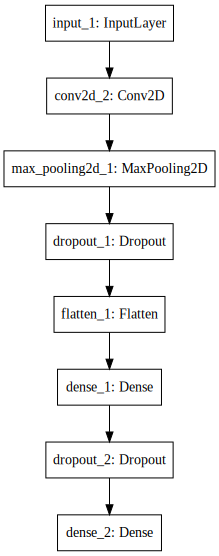

In [8]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [9]:
import os.path
    
if(os.path.isfile('MINST.h5')):
    model = load_model('MINST.h5')
else:
    model.fit(x_train, y_train,
              batch_size=16,
              epochs=16,
              verbose=1,
              validation_data=(x_test, y_test))

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)

In [11]:
score

[0.052561486376146785, 0.98209999999999997]

In [ ]:
model.save('MINST.h5')

In [12]:
%matplotlib notebook

import cv2
import matplotlib.pyplot as plt
import signal

In [13]:
def signal_handler(signal, frame):
    # KeyboardInterrupt detected, exiting
    global is_interrupted
    is_interrupted = True

<IPython.core.display.Javascript object>


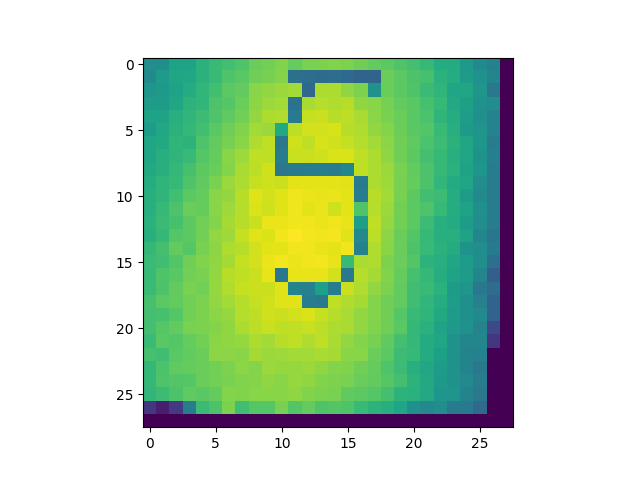

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/backend_bases.py:2453: MatplotlibDeprecationWarning: Using default event loop until function specific to this GUI is implemented
  warnings.warn(str, mplDeprecation)
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order 

In [14]:
vc = cv2.VideoCapture(0)

plt.ion()

if vc.isOpened(): # try to get the first frame
    is_capturing, frame = vc.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored
    webcam_preview = plt.imshow(frame)    
else:
    is_capturing = False

signal.signal(signal.SIGINT, signal_handler)
is_interrupted = False
frame = None
while is_capturing:
    is_capturing, frame = vc.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored
    webcam_preview.set_data(frame)
    plt.draw()
    try:    # Avoids a NotImplementedError caused by `plt.pause`
        plt.pause(0.05)
    except Exception:
        pass
    if is_interrupted:
        vc.release()
        break




In [15]:
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
frame = cv2.resize(frame, (28, 28), interpolation = cv2.INTER_CUBIC)
plt.imshow(frame)
plt.draw()

In [16]:
print(x_train.shape, frame.shape)

(60000, 28, 28, 1) (28, 28)


In [17]:
frame = frame.reshape(1, 28, 28, 1)
print(frame.shape)


(1, 28, 28, 1)


In [18]:
prediction = model.predict(frame)
np.argmax(prediction)

8